In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


---

In [2]:
from keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten
import openpyxl

In [3]:
classes = [f for f in os.listdir('movie_dataset/train')]
print(classes)

['El caballero oscuro', 'El padrino', 'El señor de los anillos El retorno del rey', 'Titanic']


In [4]:
#Exploramos las carpetas...
import os
for dir, dirname, files in os.walk('movie_dataset'):
  print(f"Dir: {dir} | subdir: {dirname} | cant de imagenes: {len(files)} ")

Dir: movie_dataset | subdir: ['test', 'train'] | cant de imagenes: 0 
Dir: movie_dataset\test | subdir: ['El caballero oscuro', 'El padrino', 'El señor de los anillos El retorno del rey', 'Titanic'] | cant de imagenes: 0 
Dir: movie_dataset\test\El caballero oscuro | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\test\El padrino | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\test\El señor de los anillos El retorno del rey | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\test\Titanic | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\train | subdir: ['El caballero oscuro', 'El padrino', 'El señor de los anillos El retorno del rey', 'Titanic'] | cant de imagenes: 0 
Dir: movie_dataset\train\El caballero oscuro | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\train\El padrino | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\train\El señor de los anillos El retorno del rey | subdir: [] | cant de imagenes: 250 
Dir: movie_dataset\train\Titanic

In [5]:
classes = [f for f in os.listdir('movie_dataset/train')]
print(classes)

['El caballero oscuro', 'El padrino', 'El señor de los anillos El retorno del rey', 'Titanic']


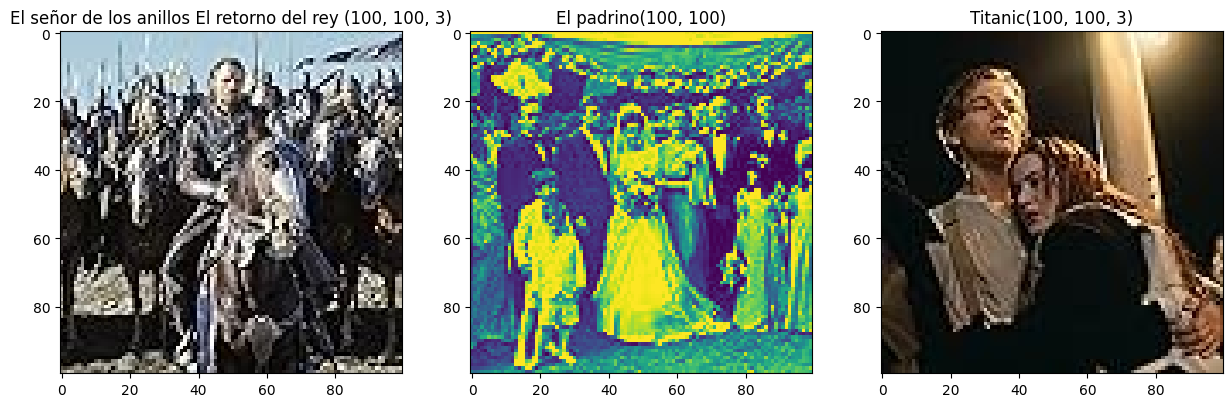

In [6]:
import matplotlib.pyplot as plt
import random, os

plt.figure(figsize=(15,7))
id = random.choice(range(0,16))
plt.subplot(1,3,1)
img_name = [f for f in os.listdir('movie_dataset/train/El señor de los anillos El retorno del rey/')][id]
img = plt.imread('movie_dataset/train/El señor de los anillos El retorno del rey/'+img_name)
plt.imshow(img)
plt.title('El señor de los anillos El retorno del rey '+str(img.shape))
plt.subplot(1,3,2)
img_name = [f for f in os.listdir('movie_dataset/train/El padrino/')][id]
img = plt.imread('movie_dataset/train/El padrino/'+img_name)
plt.imshow(img)
plt.title('El padrino'+str(img.shape))
plt.subplot(1,3,3)
img_name = [f for f in os.listdir('movie_dataset/train/Titanic/')][id]
img = plt.imread('movie_dataset/train/Titanic/'+img_name)
plt.imshow(img)
plt.title('Titanic'+str(img.shape));

In [7]:
#Exploramos los características de las imágenes
list_img_film = [f for f in os.listdir('movie_dataset/train/Titanic')]
test_img = plt.imread('movie_dataset/train/Titanic/'+random.choice(list_img_film)) #Elegimos la primera de las imágenes de la lista para leerlas
print(f"Shape de la imagen: {test_img.shape}")
print(f"Dimensiones de la imagen: {test_img.ndim}")
print(f"Codificación la imagen: {test_img.dtype}")
print(f"Pixel de mayor valor: {test_img.max()}")
print(f"Pixel de menor valor: {test_img.min()}")

Shape de la imagen: (100, 100, 3)
Dimensiones de la imagen: 3
Codificación la imagen: uint8
Pixel de mayor valor: 255
Pixel de menor valor: 0


In [8]:
import tensorflow as tf
print(f"Version: {tf.version}")

Version: <module 'tensorflow._api.v2.version' from 'c:\\Users\\Nicolas\\Proyectos Programacion\\Inteligencia_Artificial\\movie-classifier\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


Entrenamos el Modelo

In [9]:
import tensorflow as tf

# Configuración de la semilla aleatoria para reproducibilidad
tf.random.set_seed(42)

# Directorios de entrenamiento y prueba
train_dir = 'movie_dataset/train/'
test_dir = 'movie_dataset/test/'

# Data augmentation
# Generadores de datos de entrenamiento y prueba con normalización y aumento de datos
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,       # Aumento de rotación
    width_shift_range=0.2,   # Aumento de cambio de ancho
    height_shift_range=0.2,  # Aumento de cambio de alto
    shear_range=0.2,         # Distorción
    zoom_range=0.2           # Aumento de zoom
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_batch = train_generator.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=240,
    class_mode='categorical'
)

test_batch = test_generator.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=240,
    class_mode='categorical'
)

Found 1000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


In [10]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [11]:
# Compilación del modelo
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(), #learning_rate=0.0001
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [12]:
from tensorflow.keras.callbacks import TensorBoard

In [13]:
# Entrenamiento del modelo
tensorboardDenso = TensorBoard(log_dir='logs')
model_cnn.fit(
    train_batch,
    epochs=200,
    validation_data=test_batch,
    callbacks=[
        tensorboardDenso,
        tf.keras.callbacks.EarlyStopping(patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(patience=5)
    ]
)

# Evaluación del modelo en el conjunto de prueba
test_accuracy = model_cnn.evaluate(test_batch)

Epoch 1/200
5/5 [==============================] - 30s 6s/step - loss: 1.6767 - accuracy: 0.2920 - val_loss: 1.3620 - val_accuracy: 0.3310 - lr: 0.0010
Epoch 2/200
5/5 [==============================] - 28s 5s/step - loss: 1.3505 - accuracy: 0.3180 - val_loss: 1.3092 - val_accuracy: 0.3830 - lr: 0.0010
Epoch 3/200
5/5 [==============================] - 28s 5s/step - loss: 1.3006 - accuracy: 0.3930 - val_loss: 1.2890 - val_accuracy: 0.3900 - lr: 0.0010
Epoch 4/200
5/5 [==============================] - 27s 5s/step - loss: 1.2652 - accuracy: 0.4160 - val_loss: 1.2223 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 5/200
5/5 [==============================] - 28s 7s/step - loss: 1.2195 - accuracy: 0.4270 - val_loss: 1.1990 - val_accuracy: 0.5030 - lr: 0.0010
Epoch 6/200
5/5 [==============================] - 29s 6s/step - loss: 1.2044 - accuracy: 0.4380 - val_loss: 1.1799 - val_accuracy: 0.4850 - lr: 0.0010
Epoch 7/200
5/5 [==============================] - 28s 5s/step - loss: 1.1799 - accuracy

In [14]:
%load_ext tensorboard

Guardamos nuestro modelo

In [15]:
model_cnn.save('films_classifier.h5')

c:\Users\Nicolas\Proyectos Programacion\Inteligencia_Artificial\movie-classifier\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
mkdir output_directory

In [18]:
!tensorflowjs_converter --input_format keras films_classifier.h5 output_directory

C:\Users\Nicolas\Proyectos Programacion\Inteligencia_Artificial\movie-classifier\lib\site-packages\tensorflowjs\read_weights.py:28: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.uint8, np.uint16, np.object, np.bool]
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\Users\Nicolas\Proyectos Programacion\Inteligencia_Artificial\movie-classifier\Scripts\tensorflowjs_converter.exe\__main__.py", line 4, in <module>
  File "C:\Users\Nicolas\Proyectos Programacion\Inteligencia_Artificial\movie-classifier\lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensor

In [31]:
# Realizamos una predicción

# Elegimos una imagen de prueba
img = plt.imread(r'movie_dataset\test\El caballero oscuro\251.jpg')

# Reescalamos la imagen para introducirla al modelo
img = img/255.

# Ajustamos las dimensiones de la imagen
img.resize((224,224,3))
img_exp = tf.expand_dims(img, axis=0)

y_pred = model_cnn.predict(img_exp)
print(f"Predicción: {y_pred}") # Softmax

1/1 [==============================] - 0s 38ms/step
Predicción: [[1.0000000e+00 4.6058126e-11 5.1639639e-15 7.2623911e-09]]


In [32]:
y_pred = tf.squeeze(y_pred)
tf.math.reduce_sum(y_pred).numpy()

1.0

In [33]:
tf.argmax(y_pred).numpy()

0

In [34]:
y_pred = tf.squeeze(y_pred)
y_pred = tf.round(y_pred)
print(f"Predicción de la imagen: {y_pred}") # Argmax

Predicción de la imagen: [1. 0. 0. 0.]


In [35]:
# Retornar el indice mayor de todos los items
y_pred = tf.argmax(y_pred)
print(f"La clase es: {classes[y_pred]}")

La clase es: El caballero oscuro
